# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from datetime import date
from scipy import stats

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


595

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# weather api config info
url = "http://api.openweathermap.org/data/2.5/weather?"

# parameters for api call, use imperial units and import weather api key
params = {
    'units': 'imperial',
    'appid': weather_api_key
}

city_data_list = []

count = 0

# Begin print log
print('-'*30)
print('Beginning Data Retrieval Process')
print('-'*30)

# loop through each city and gather necessary data from api call
for city in cities:
    
    params['q'] = city
    
    # try to pull data
    try:
        
        response = requests.get(url, params = params)
        city_data_json = response.json()
        
        # append city data to dictionary to be appended
        city_data_dict = {
            'City': city,
            'Country': city_data_json['sys']['country'],
            'Cloudiness': city_data_json['clouds']['all'],
            'Date': city_data_json['dt'],
            'Humidity': city_data_json['main']['humidity'],
            'Lat': city_data_json['coord']['lat'],
            'Lng': city_data_json['coord']['lon'],
            'Max Temp': city_data_json['main']['temp_max'],
            'Wind Speed': city_data_json['wind']['speed']
        }
        
        city_data_list.append(city_data_dict)
        
        # print log after city data apprehended successfully
        print(f"Gathered data for city number {count}: {city}")
        
    #  Print error if cannot pull city data  
    except:
        print(f"Error: Could not retrieve data for city number {count}: {city}")
    
    count += 1

print('-'*30)
print('Data Retrieval Process Done')
print('-'*30)


------------------------------
Beginning Data Retrieval Process
------------------------------
Gathered data for city number 0: kushmurun
Gathered data for city number 1: saint george
Gathered data for city number 2: kodiak
Gathered data for city number 3: port alfred
Gathered data for city number 4: bluff
Gathered data for city number 5: joao pinheiro
Gathered data for city number 6: bacsay
Gathered data for city number 7: tiksi
Gathered data for city number 8: hobyo
Gathered data for city number 9: sheboygan
Gathered data for city number 10: puerto ayora
Gathered data for city number 11: dodge city
Gathered data for city number 12: beringovskiy
Gathered data for city number 13: rikitea
Error: Could not retrieve data for city number 14: ijaki
Gathered data for city number 15: punta arenas
Error: Could not retrieve data for city number 16: illoqqortoormiut
Gathered data for city number 17: ilulissat
Gathered data for city number 18: ovalle
Gathered data for city number 19: albany
Gathe

In [6]:
len(city_data_list)

548

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# convert list of dictionaries to data frame
city_data_df = pd.DataFrame.from_dict(city_data_list)

# set index to be City ID
city_data_df.index.name = 'City ID'

# output city data frame to csv
city_data_df.to_csv(output_data_file)

city_data_df.head()

,City,Country,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City ID,,,,,,,,,
0,kushmurun,KZ,98,1632243372,67,52.4503,64.6311,40.98,3.67
1,saint george,US,0,1632243323,19,37.1041,-113.5841,74.43,1.99
2,kodiak,US,0,1632243372,51,57.7900,-152.4072,41.36,25.81
3,port alfred,ZA,98,1632243373,69,-33.5906,26.8910,59.18,5.44
4,bluff,NZ,35,1632243373,73,-46.6000,168.3333,44.80,16.02


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
# Check if any humidities are greater than 100%
sum(city_data_df['Humidity']>100)

# There are NONE, so skipping next steps

0

In [9]:
#  Get the indices of cities that have humidity over 100%.


In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

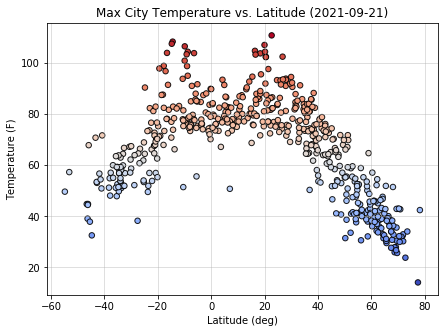

In [11]:
# set x and y values to be plotted
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']

# create figure and axis
fig, ax = plt.subplots(1,1,figsize=(7,5))

# plot scatter plot
ax.scatter(x=lats, y=max_temps, c = max_temps, s=30, edgecolors='black', cmap="coolwarm", alpha=30)

# formatting
ax.set_xlabel("Latitude (deg)")

ax.set_ylabel("Temperature (F)")

ax.set_title(f"Max City Temperature vs. Latitude ({date.today()})")

ax.grid(alpha = 0.5)

# save image as png
plt.savefig("Images/citytemp_v_lat.png")

plt.show()

### Oberservations
* Temperature vs. Latitude plot clearly shows that the temperature is highest centered around Latitude = 0 degrees (at the equator). As the latitude increases or decreases from the center line, the max temperature drops with strong correlation.
* NOTE: There are no cities with latitude less than ~ -60 degrees. Latitudes more south than this point correspond to places in the south pole, where there are almost no cities. Therefore, cities are difficult to find on any latitude points at or below -60.

## Latitude vs. Humidity Plot

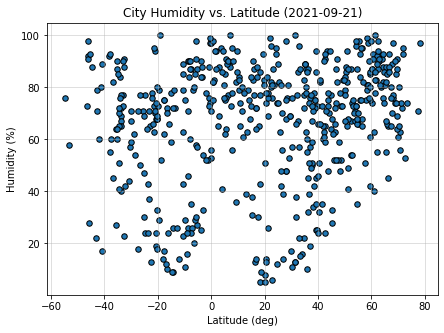

In [12]:
# set x and y values to be plotted
lats = city_data_df['Lat']
hums = city_data_df['Humidity']

# create figure and axis
fig, ax = plt.subplots(1,1,figsize=(7,5))

# plot scatter plot on axis
ax.scatter(x=lats, y=hums, s=30, edgecolors='black', alpha=1)

# formatting
ax.set_xlabel("Latitude (deg)")

ax.set_ylabel("Humidity (%)")

ax.set_title(f"City Humidity vs. Latitude ({date.today()})")

ax.grid(alpha = 0.5)

# save figure as png
plt.savefig("Images/city_humidity_v_lat.png")

plt.show()

### Oberservations
* There seems to be a higher prevalance of humidity percentages above 50% across all latitudes. However, there is not distinguishable trend between humidity and latitude.

## Latitude vs. Cloudiness Plot

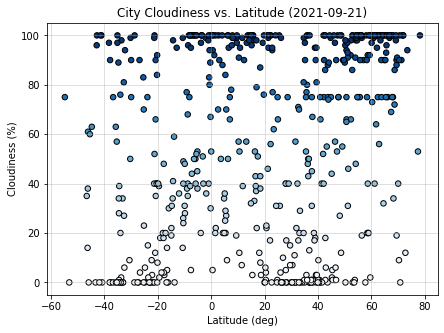

In [13]:
lats = city_data_df['Lat']
clouds = city_data_df['Cloudiness']

fig, ax = plt.subplots(1,1,figsize=(7,5))

ax.scatter(x=lats, y=clouds, c=clouds, cmap = 'Blues', s=30, edgecolors='black', alpha=1)

ax.set_xlabel("Latitude (deg)")

ax.set_ylabel("Cloudiness (%)")

ax.set_title(f"City Cloudiness vs. Latitude ({date.today()})")

ax.grid(alpha = 0.5)

plt.savefig("Images/city_cloudiness_v_lat.png")


plt.show()

### Oberservations
* Measurements of cloudiness seem to be weighted towards either 0% or 100%. 
* No strong trend between cloudiness and latitude

## Latitude vs. Wind Speed Plot

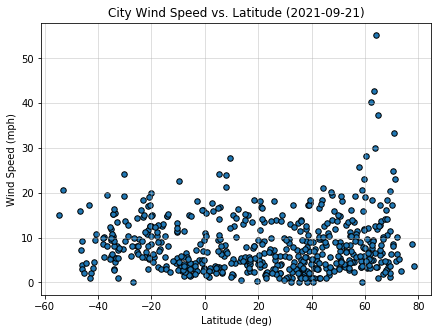

In [14]:
lats = city_data_df['Lat']
wind_s = city_data_df['Wind Speed']

fig, ax = plt.subplots(1,1,figsize=(7,5))

ax.scatter(x=lats, y=wind_s, s=30, edgecolors='black', alpha=1)

ax.set_xlabel("Latitude (deg)")

ax.set_ylabel("Wind Speed (mph)")

ax.set_title(f"City Wind Speed vs. Latitude ({date.today()})")

ax.grid(alpha = 0.5)

plt.savefig("Images/city_windspeed_v_lat.png")

plt.show()

### Oberservations
* Wind speeds are clustered below 20 mph with no strong dependence on latitude

## Linear Regression

In [17]:
# create northern and southern hemisphere dataframes.

northern_hem_df = city_data_df[city_data_df['Lat'] > 0]
southern_hem_df = city_data_df[city_data_df['Lat'] < 0]

# create function to plot scatter plot with linear regression and r-value

def plt_scat(x_vals, y_vals, xlabel, ylabel, title, filepath):
    fig, ax = plt.subplots(1,1,figsize=(7,5))

    slope, intercept, r_val, p_val, std_err = stats.linregress(x_vals, y_vals)
    corr = stats.pearsonr(x_vals, y_vals)[0]
    
    y_fit = slope * x_vals + intercept
    y_fit_label = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    
    ax.scatter(x=x_vals, y=y_vals, s=30, edgecolors='black', alpha=1)
    ax.plot(x_vals, y_fit, linestyle="--", color = 'red', alpha = 0.5, label =y_fit_label)
    
    ax.set_xlim(min(x_vals)-2, max(x_vals)+2)
    ax.set_ylim(min(y_vals)-2, max(y_vals)+2)
    
    ax.legend(loc='best', fontsize = 12)
    
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(f"{title} ({date.today()})")

    ax.grid(alpha = 0.5)

    print(f"The r-value is: {corr}")
    
    plt.savefig(filepath)

    plt.show()



####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8365813000869506


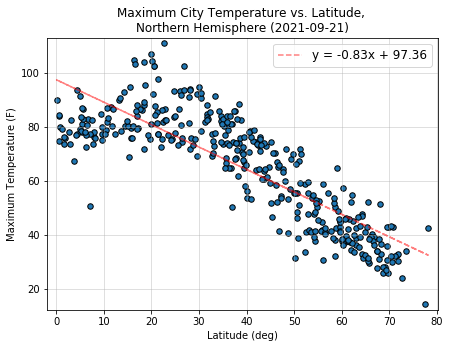

In [19]:
# create northern hemp x and y values
x = northern_hem_df['Lat']
y = northern_hem_df['Max Temp']

# plot scatter plot with linear regression on top
plt_scat(x, y, xlabel = "Latitude (deg)", ylabel='Maximum Temperature (F)', title = "Maximum City Temperature vs. Latitude, \nNorthern Hemisphere", filepath="Images/northern_temp_v_lat.png")


### Oberservations
* Strong negative correlation of -0.84 between Maximum temperature and latitude in the northern hemisphere. As the latitude gets higher (more north), the maximum temperature will decrease with strong confidence. 
* This is expected.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.709187360242665


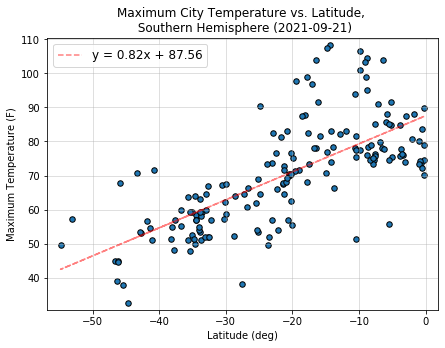

In [20]:
x = southern_hem_df['Lat']
y = southern_hem_df['Max Temp']

plt_scat(x, y, xlabel = "Latitude (deg)", ylabel='Maximum Temperature (F)', title = "Maximum City Temperature vs. Latitude, \n Southern Hemisphere", filepath="Images/southern_temp_v_lat.png")


### Oberservations
* Strong positive correlation of 0.71 between Maximum temperature and latitude in the southern hemisphere. As the latitude increases (more north), the maximum temperature will increase with strong confidence. THis is expected
* The southern hemisphere data is slightly more skewed around the center line. However, this is partly due to few number of cities in the southern hempisphere data.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.13143942353920862


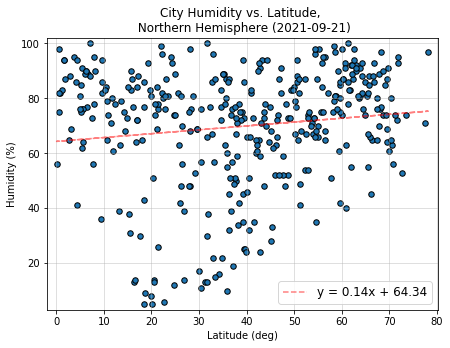

In [21]:
x = northern_hem_df['Lat']
y = northern_hem_df['Humidity']

plt_scat(x, y, xlabel = "Latitude (deg)", ylabel='Humidity (%)', title = "City Humidity vs. Latitude, \n Northern Hemisphere", filepath="Images/northern_hum_v_lat.png")


### Oberservations
* Very weak positive correlation between humidity and latitude in the northern hemisphere. I would expect the humidity to be more heavily correlated to cities near bodies of water.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.08609458828689016


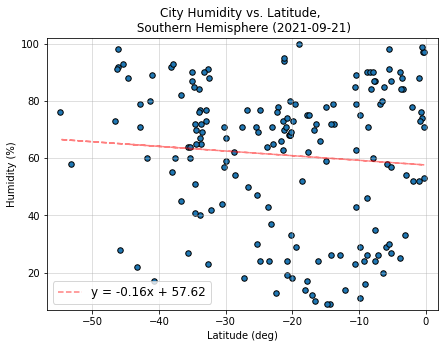

In [22]:
x = southern_hem_df['Lat']
y = southern_hem_df['Humidity']

plt_scat(x, y, xlabel = "Latitude (deg)", ylabel='Humidity (%)', title = "City Humidity vs. Latitude, \n Southern Hemisphere", filepath="Images/southern_hum_v_lat.png")


### Oberservations
* Very weak negative correlation between humidity and latitude in the southern hemisphere. I would expect the humidity to be more heavily correlated to cities near bodies of water.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.23071957775909244


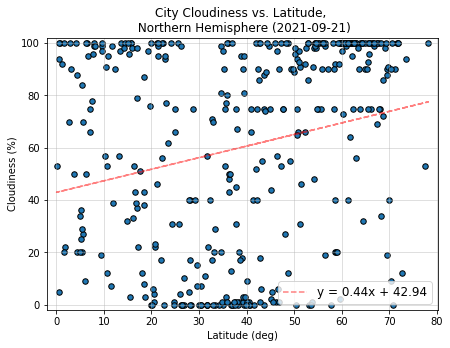

In [23]:
x = northern_hem_df['Lat']
y = northern_hem_df['Cloudiness']

plt_scat(x, y, xlabel = "Latitude (deg)", ylabel='Cloudiness (%)', title = "City Cloudiness vs. Latitude, \n Northern Hemisphere", filepath="Images/northern_cloudiness_v_lat.png")


### Oberservations
* Non-negligable correlation between latitude and cloudiness percentage in the northern hemisphere. However, I think this trend is very minor and would decrease with addiitonal cities.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.24835394963770527


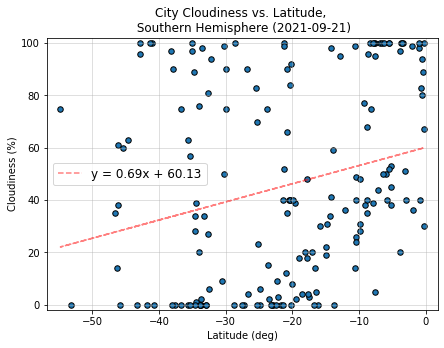

In [27]:
x = southern_hem_df['Lat']
y = southern_hem_df['Cloudiness']

plt_scat(x, y, xlabel = "Latitude (deg)", ylabel='Cloudiness (%)', title = "City Cloudiness vs. Latitude, \n Southern Hemisphere", filepath="Images/southern_cloudiness_v_lat.png")

### Oberservations
* Non-negligable correlation between latitude and cloudiness percentage in the northern hemisphere. However, I think this trend is very minor and would decrease with addiitonal cities. 
* This is also the opposite trend we see in the northern hemisphere, which leads to the conclusion that the correlation is not real. Further city data points would likely decrease correlation factor.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.15507712563921722


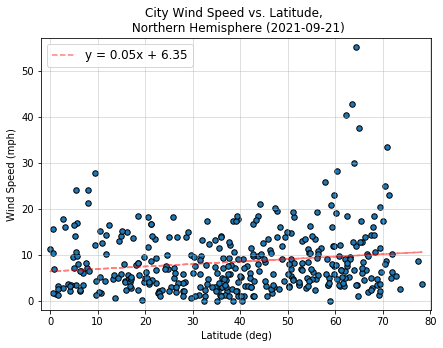

In [25]:
x = northern_hem_df['Lat']
y = northern_hem_df['Wind Speed']

plt_scat(x, y, xlabel = "Latitude (deg)", ylabel='Wind Speed (mph)', title = "City Wind Speed vs. Latitude, \n Northern Hemisphere", filepath="Images/northern_windspeed_v_lat.png")

### Oberservations
* Non-negligable correlation between latitude and windspeed in the northern hemisphere. However, I think this trend is very minor and would decrease with addiitonal cities, and if the outlier data points are removed.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.21866042143697126


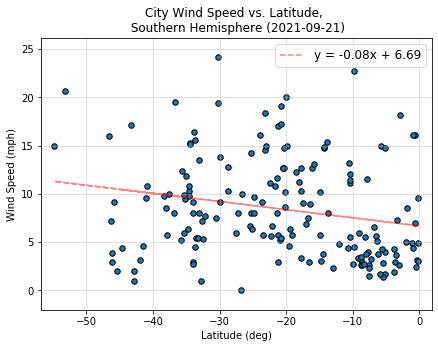

In [26]:
x = southern_hem_df['Lat']
y = southern_hem_df['Wind Speed']

plt_scat(x, y, xlabel = "Latitude (deg)", ylabel='Wind Speed (mph)', title = "City Wind Speed vs. Latitude, \n Southern Hemisphere", filepath="Images/southern_windspeed_v_lat.png")

### Oberservations
* Non-negligable correlation between latitude and windspeed in the southern hemisphere. However, I think this trend is very minor and would decrease with addiitonal cities, and if the outlier data points are removed. It is also the opposite trend as the nothern hemisphere data, so I believe the trend would dissipate with more cities.